In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import f_oneway

In [2]:
import pandas as pd

accidents = pd.read_csv('datasets\\accident_data.csv')

In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
accidents.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
### Change the data types to category
categorical_columns = [
    'Index', 'Accident_Severity', 'Accident Date', 'Light_Conditions', 
    'District Area', 'Road_Surface_Conditions', 'Road_Type', 
    'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'
]

for col in categorical_columns:
    accidents[col] = accidents[col].astype('category')

# Check the new data types
print(accidents.dtypes)

Index                      category
Accident_Severity          category
Accident Date              category
Latitude                    float64
Light_Conditions           category
District Area              category
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object


In [6]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1> Filling up Null Values </h1>

In [7]:
accidents['Accident Date'] = accidents['Accident Date'].fillna(accidents['Accident Date'].mode()[0])
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mode()[0])
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mode()[0])
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna(accidents['Road_Surface_Conditions'].mode()[0])
accidents['Road_Type'] = accidents['Road_Type'].fillna(accidents['Road_Type'].mode()[0])
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna(accidents['Urban_or_Rural_Area'].mode()[0])
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].replace({None: 'Unknown'})
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                      0
Urban_or_Rural_Area            0
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [8]:
accidents.dtypes

Index                      category
Accident_Severity          category
Accident Date              category
Latitude                    float64
Light_Conditions           category
District Area              category
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

In [9]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst = True, errors='coerce')
accidents.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1> 1. Does the Weather Condition affect the Accident Severity? </h1>

In [10]:
q1 = accidents.groupby(['Weather_Conditions', 'Accident_Severity']).size()
q1.unstack()

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7100,72046,441739
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637


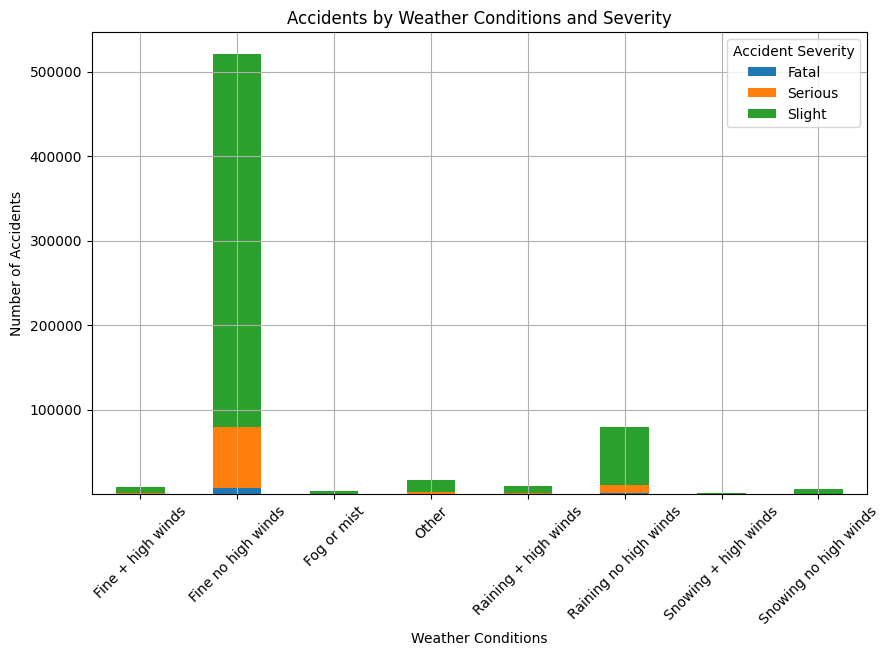

In [11]:
# Assuming q1 is already defined as in your code
q1 = accidents.groupby(['Weather_Conditions', 'Accident_Severity']).size()
unstacked_q1 = q1.unstack()

# Plotting the unstacked data
unstacked_q1.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding title and labels
plt.title('Accidents by Weather Conditions and Severity')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot

<h3> Insight No.1 Fine no high winds: This category has the highest number of accidents in all severity levels (Fatal, Serious, and Slight). It suggests that even without high winds, fine weather can still be associated with a high number of accidents, possibly due to increased traffic or higher speeds. </h3>

<h3> Insight No.2 Fine + high winds: This condition also shows a significant number of accidents, although lower compared to fine weather without high winds. </h3>

<h1> 2. What is the distribution of vehicle types involved in accidents? </h1>

In [12]:
q2 = accidents['Vehicle_Type'].value_counts()
q2

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

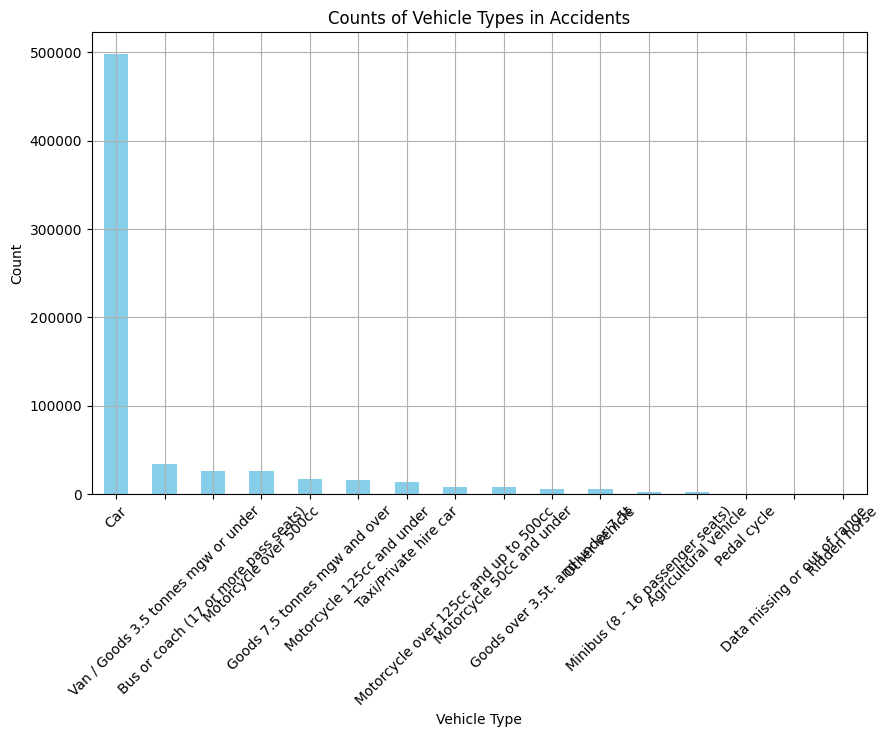

In [13]:
# Assuming q2 is already defined as in your code
q2 = accidents['Vehicle_Type'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
q2.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Counts of Vehicle Types in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()

<h3> Insight No. 3 Cars are the most common vehicle type in accidents, likely due to their high prevalence on the roads. </h3>

<h3> Insight No.4 Commercial Vehicles like vans, goods vehicles under 3.5 tonnes, and taxis/private hire cars also feature prominently, probably because they spend a lot of time in high-traffic areas. </h3>

<h3> Insight No.5 Motorcycles are involved in a significant number of accidents, with various types (over 500cc, 125cc and under, 50cc and under) showing notable figures. </h3>

<h3> Insight No.6 Public Transport and Large Vehicles such as buses/coaches with 17 or more passenger seats and goods vehicles over 7.5 tonnes also have significant accident rates, likely due to their size and difficulty in maneuvering. </h3>

<h3> Insight No. 7 Other Vehicles including minibuses, agricultural vehicles, and pedal cycles show lower numbers, possibly due to their lower presence on the roads. </h3>

<h3> Insight No. 8 Rare Vehicle Types like ridden horses and data with missing/out-of-range information make up a very small fraction of accidents. </h3>

<h1> 3. What are the common weather conditions during vehicle accidents? </h1>

In [14]:
weather_conditions_distribution = accidents['Weather_Conditions'].value_counts()
weather_conditions_distribution

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

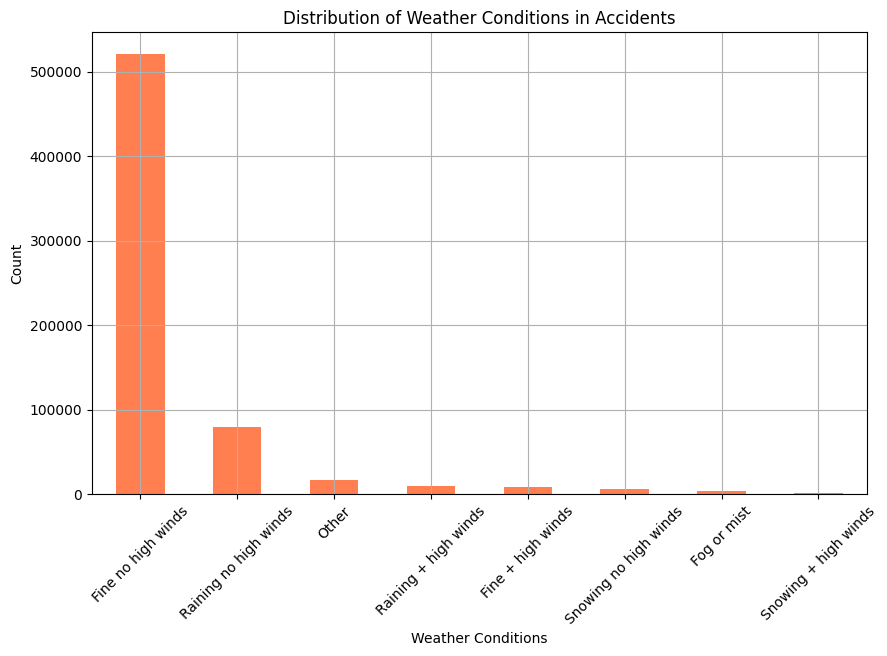

In [15]:
# Assuming weather_conditions_distribution is already defined as in your code
weather_conditions_distribution = accidents['Weather_Conditions'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
weather_conditions_distribution.plot(kind='bar', color='coral')

# Adding title and labels
plt.title('Distribution of Weather Conditions in Accidents')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()


<h3> Fine no high winds has the most accident occured amongst all weather conditions </h3>

<h1> 4.How many accidents occurred on each date? </h1>

In [16]:
accidents_per_date = accidents['Accident Date'].value_counts()
accidents_per_date

Accident Date
2021-02-11    685
2021-10-06    680
2019-12-06    678
2019-02-01    676
2021-12-04    667
             ... 
2022-01-09    236
2022-12-02    236
2022-04-05    231
2022-02-07    213
2022-01-10    123
Name: count, Length: 576, dtype: int64

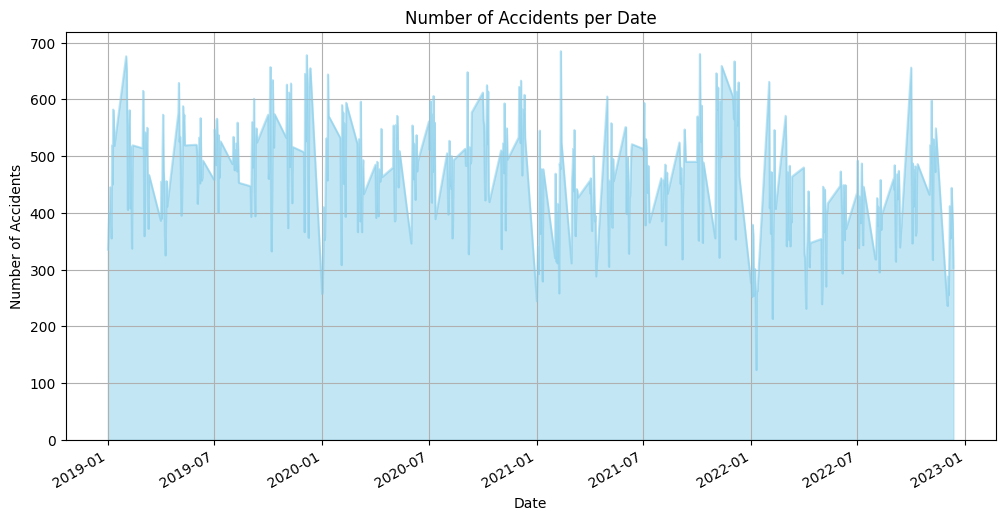

In [17]:
# Assuming accidents_per_date is already defined
plt.figure(figsize=(12, 6))
accidents_per_date.sort_index().plot(kind='area', color='skyblue', alpha=0.5)
plt.title('Number of Accidents per Date')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(True)

# Display the plot
plt.show()

<h3> 2021-02-11 has the most number of accidents in each date </h3>

<h1> 5.What are the common light conditions during accidents? </h1>

In [18]:
light_conditions_distribution = accidents['Light_Conditions'].value_counts()
light_conditions_distribution

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

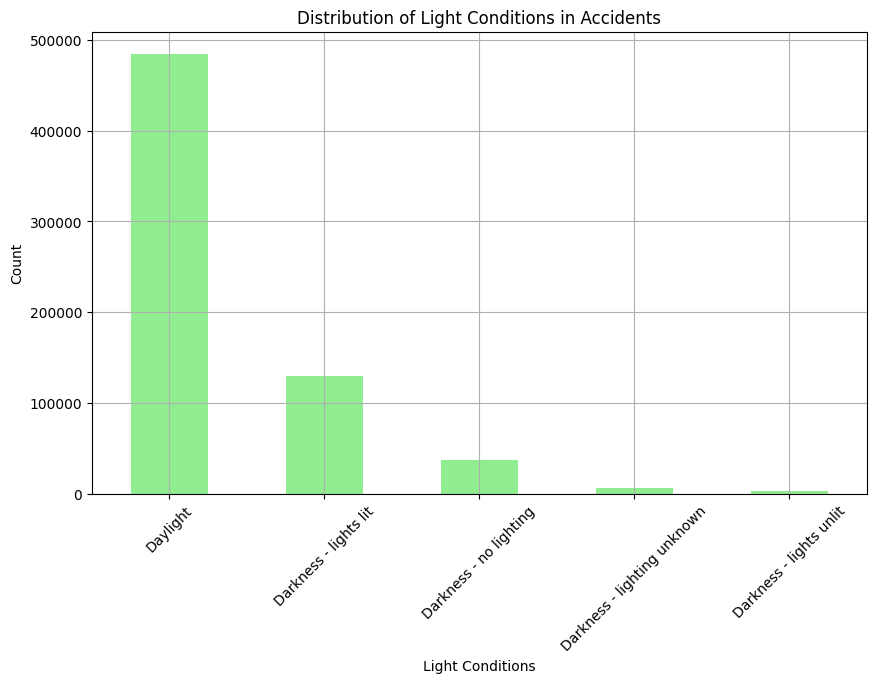

In [19]:
# Assuming light_conditions_distribution is already defined as in your code
light_conditions_distribution = accidents['Light_Conditions'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
light_conditions_distribution.plot(kind='bar', color='lightgreen')

# Adding title and labels
plt.title('Distribution of Light Conditions in Accidents')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()

<h3> Accidents mostly occured in Daylight </h3>

<h1> 6.Which district areas have the highest number of accidents? </h1>

In [20]:
district_accidents = accidents['District Area'].value_counts()
district_accidents

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

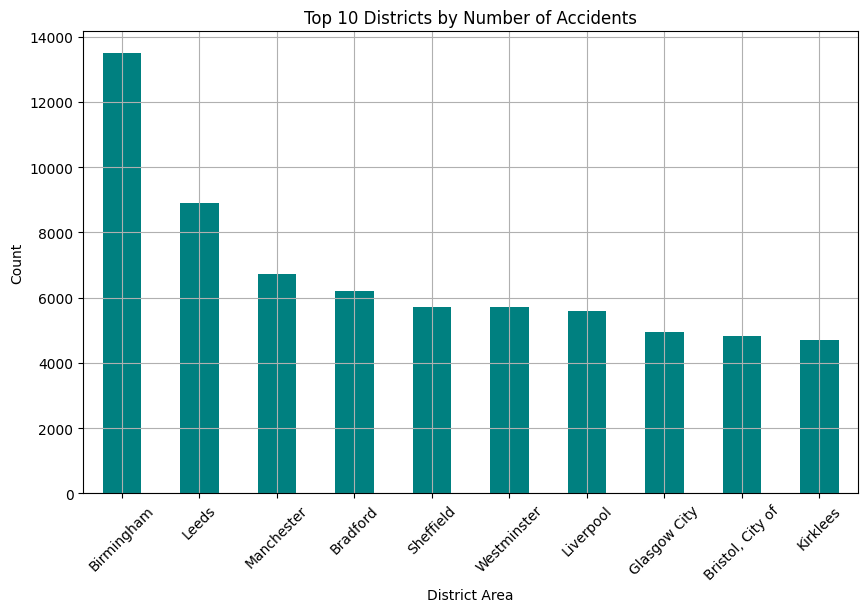

In [21]:
# Assuming district_accidents is already defined
top_n = 10
top_districts = district_accidents.head(top_n)

# Plotting the data
plt.figure(figsize=(10, 6))
top_districts.plot(kind='bar', color='teal')

# Adding title and labels
plt.title(f'Top {top_n} Districts by Number of Accidents')
plt.xlabel('District Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()

<h3> Birmingham has the most number of accidents with 13491 cases </h3>

<h1> 7. How does the number of casualties vary with the severity of accidents? </h1>

In [22]:
accidents.groupby('Accident_Severity')['Number_of_Casualties'].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

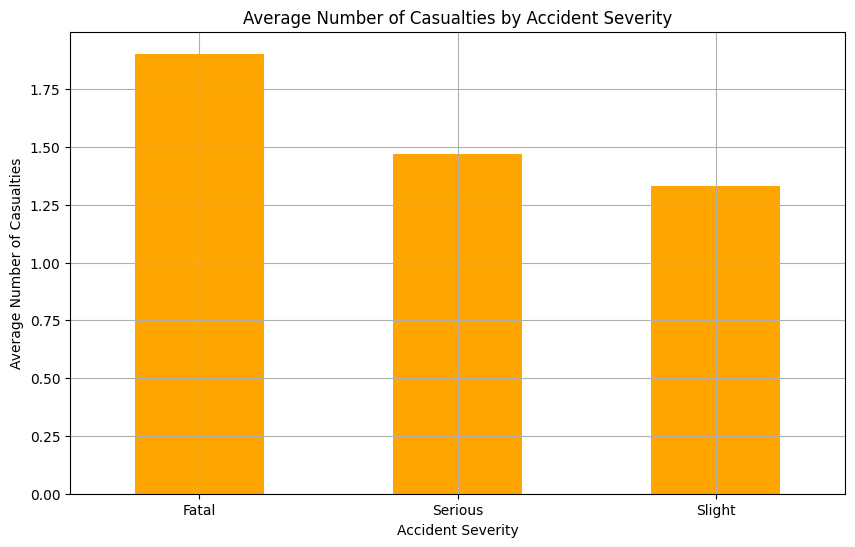

In [23]:
# Calculate the mean number of casualties by accident severity
mean_casualties = accidents.groupby('Accident_Severity')['Number_of_Casualties'].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
mean_casualties.plot(kind='bar', color='orange')

# Adding title and labels
plt.title('Average Number of Casualties by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Average Number of Casualties')
plt.xticks(rotation=0)
plt.grid(True)

# Display the plot
plt.show()

<h1> 8. Which district areas have the lowest number of accidents? </h1>

In [24]:
district_accidents = accidents['District Area'].value_counts()
district_accidents


District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

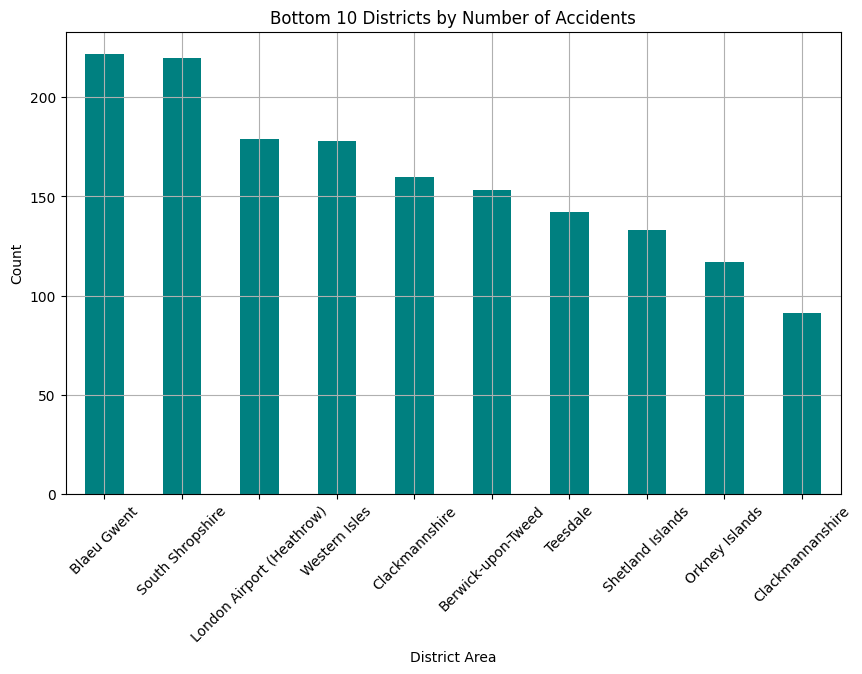

In [25]:
# Assuming district_accidents is already defined
bottom_n = 10
bottom_districts = district_accidents.tail(bottom_n)

# Plotting the data
plt.figure(figsize=(10, 6))
bottom_districts.plot(kind='bar', color='teal')

# Adding title and labels
plt.title(f'Bottom {bottom_n} Districts by Number of Accidents')
plt.xlabel('District Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()

<h3> Clackmannanshire has the lowest number of accidents </h3>

<h1> 9. Which vehicle type is the safest based on accident severity data? </h1>

In [26]:
vehicle_safety = accidents.groupby('Vehicle_Type')['Accident_Severity'].value_counts(normalize=True).unstack().fillna(0)
np.round(vehicle_safety * 100), 1

(Accident_Severity                      Fatal  Serious  Slight
 Vehicle_Type                                                 
 Agricultural vehicle                     1.0     14.0    84.0
 Bus or coach (17 or more pass seats)     1.0     13.0    86.0
 Car                                      1.0     13.0    85.0
 Data missing or out of range             0.0      0.0   100.0
 Goods 7.5 tonnes mgw and over            1.0     13.0    85.0
 Goods over 3.5t. and under 7.5t          1.0     14.0    85.0
 Minibus (8 - 16 passenger seats)         1.0     14.0    85.0
 Motorcycle 125cc and under               1.0     13.0    85.0
 Motorcycle 50cc and under                1.0     13.0    85.0
 Motorcycle over 125cc and up to 500cc    1.0     13.0    85.0
 Motorcycle over 500cc                    1.0     13.0    85.0
 Other vehicle                            1.0     14.0    85.0
 Pedal cycle                              3.0     20.0    77.0
 Ridden horse                             0.0      0.0 

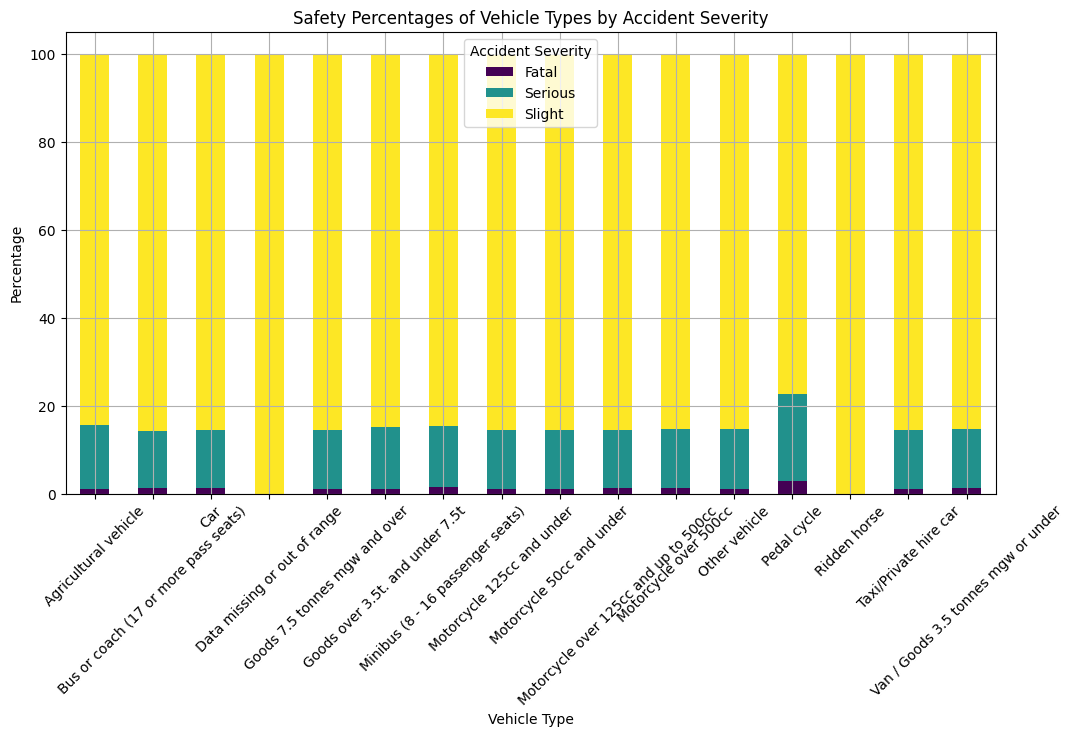

In [27]:
# Calculate the safety percentages and round them to the nearest whole number
vehicle_safety = accidents.groupby('Vehicle_Type')['Accident_Severity'].value_counts(normalize=True).unstack().fillna(0)
vehicle_safety = np.round(vehicle_safety * 100, 1)

# Plotting the data
vehicle_safety.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Adding title and labelsbb
plt.title('Safety Percentages of Vehicle Types by Accident Severity')
plt.xlabel('Vehicle Type')
plt.ylabel('Percentage')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()

<h3> Most vehicle types have a low fatality rate of 1% and the majority of accidents result in slight injuries. </h3>

<h3> Pedal cycles have a higher fatality rate of 3% and a lower percentage of slight injuries (77%). </h3>

<h3> Ridden horse accidents have no fatalities and all result in slight injuries (100%). </h3>

<h3> Ridden horse is the most safe </h3>

<h1> 10. How do accident frequencies vary across different road surface conditions, district areas, and light conditions over time? </h1>

<h2> What District Area has the highest accident occur based on light conditions?</h2>

In [28]:
accidents['Month'] = accidents['Accident Date'].dt.month
accident_frequencies_trends = accidents.groupby(['Month', 'Road_Surface_Conditions', 'District Area', 'Light_Conditions']).size().unstack().fillna(0)
accident_frequencies_trends

Light_Conditions                             Darkness - lighting unknown  \
Month Road_Surface_Conditions District Area                                
1.0   Dry                     Aberdeen City                            0   
                              Aberdeenshire                            0   
                              Adur                                     0   
                              Allerdale                                0   
                              Alnwick                                  0   
...                                                                  ...   
12.0  Wet or damp             Wychavon                                 0   
                              Wycombe                                  1   
                              Wyre                                     1   
                              Wyre Forest                              0   
                              York                                     0   

Light_Conditions                             Darkness - lights lit  \
Month Road_Surface_Conditions District Area                          
1.0   Dry                     Aberdeen City                      2   
                              Aberdeenshire                      4   
                              Adur                               1   
                              Allerdale                          0   
                              Alnwick                            0   
...                                                            ...   
12.0  Wet or damp             Wychavon                           8   
                              Wycombe                           15   
                              Wyre                              12   
                              Wyre Forest                        4   
                              York                              18   

Light_Conditions                             Darkness - lights unlit  \
Month Road_Surface_Conditions District Area                            
1.0   Dry                     Aberdeen City                        0   
                              Aberdeenshire                        0   
                              Adur                                 0   
                              Allerdale                            0   
                              Alnwick                              0   
...                                                              ...   
12.0  Wet or damp             Wychavon                             0   
                              Wycombe                              1   
                              Wyre                                 0   
                              Wyre Forest                          0   
                              York                                 0   

Light_Conditions                             Darkness - no lighting  Daylight  
Month Road_Surface_Conditions District Area                                    
1.0   Dry                     Aberdeen City                       0         7  
                              Aberdeenshire                       2         3  
                              Adur                                0         6  
                              Allerdale                           1         3  
                              Alnwick                             0         0  
...                                                             ...       ...  
12.0  Wet or damp             Wychavon                            9         8  
                              Wycombe                             6        11  
                              Wyre                                1        10  
                              Wyre Forest                         3         4  
                              York                                7        15  

[25320 rows x 5 columns]

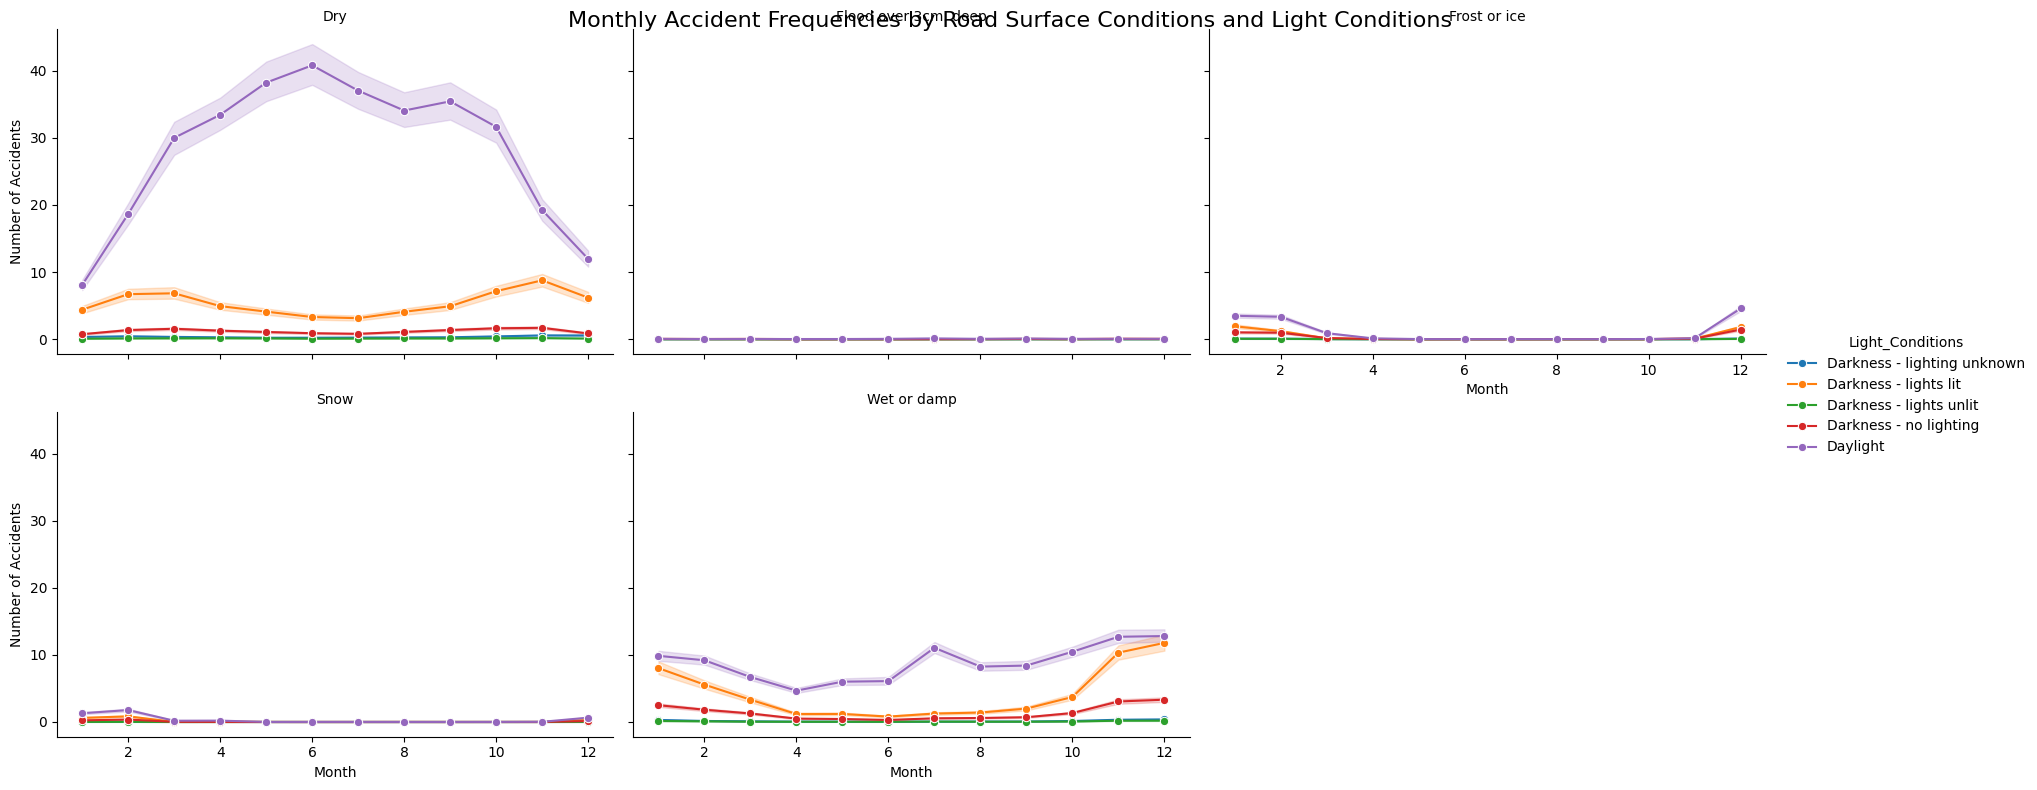

In [29]:
# Assuming accident_frequencies_trends is already defined as in your code
accidents['Month'] = accidents['Accident Date'].dt.month
accident_frequencies_trends = accidents.groupby(['Month', 'Road_Surface_Conditions', 'District Area', 'Light_Conditions']).size().reset_index(name='Count')

# Plotting the data using Seaborn's FacetGrid
g = sns.FacetGrid(accident_frequencies_trends, col='Road_Surface_Conditions', hue='Light_Conditions', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'Month', 'Count', marker='o')
g.add_legend()

# Adding title and labels
g.fig.suptitle('Monthly Accident Frequencies by Road Surface Conditions and Light Conditions', fontsize=16)
g.set_axis_labels('Month', 'Number of Accidents')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.show()

<h3> Wycombe has the highest accident occur </h3>

<h1> 11. Does road type affect accident severity? </h1>

In [30]:
road_type_severity = accidents.groupby('Road_Type')['Accident_Severity'].value_counts().unstack()
road_type_severity

Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,1815,11746,85863
One way street,95,1655,11809
Roundabout,142,3665,40185
Single carriageway,6560,70540,419563
Slip road,49,611,6381


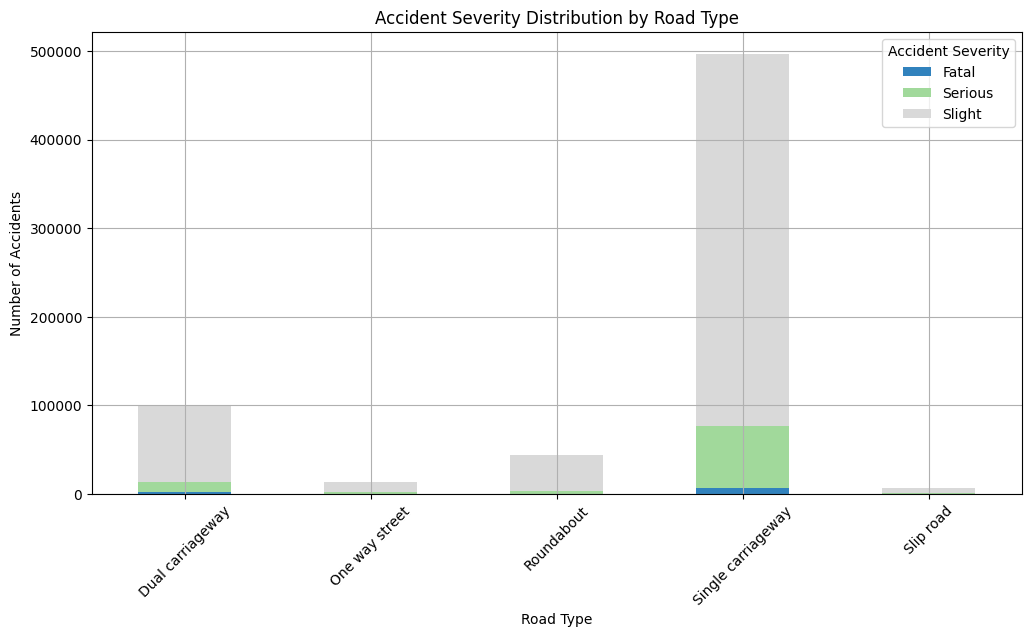

In [31]:
# Assuming road_type_severity is already defined as in your code
road_type_severity = accidents.groupby('Road_Type')['Accident_Severity'].value_counts().unstack()

# Plotting the data
road_type_severity.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')

# Adding title and labels
plt.title('Accident Severity Distribution by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()

<h3> The data indicates that road type significantly impacts the severity and frequency of accidents, with single carriageways showing the highest risk and slip roads showing the lowest. </h3>

<h1> 12. During which weather condition do most accidents occur in urban and rural areas? </h1>

In [32]:
urban_rural_weather = accidents.groupby(['Urban_or_Rural_Area', 'Weather_Conditions']).size().unstack()
urban_rural_weather

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Urban_or_Rural_Area,,,,,,,,
Rural,3993,181792,2385,7337,4723,31173,571,3050
Unallocated,1,5,0,0,0,5,0,0
Urban,4560,339088,1143,9813,4892,48518,314,3188


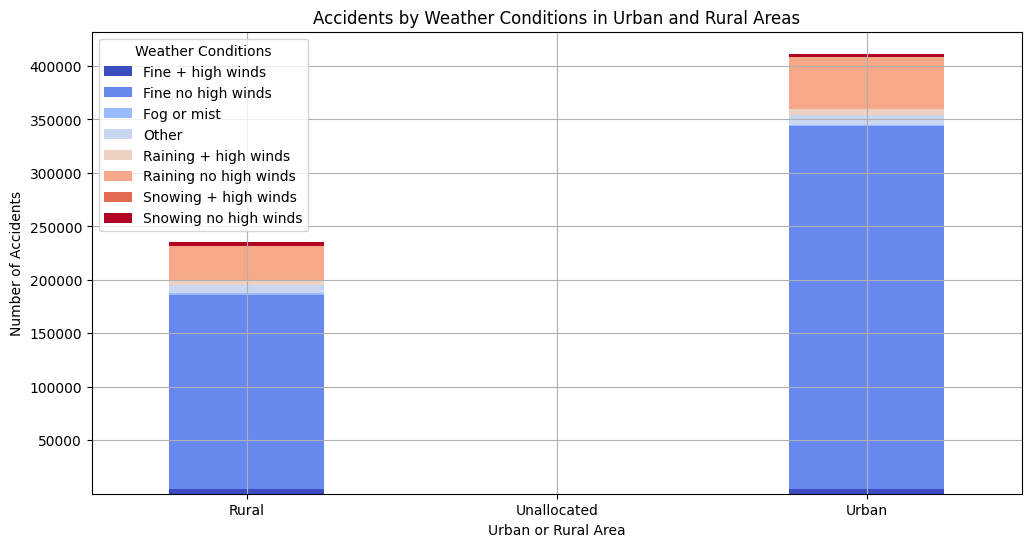

In [33]:
# Assuming urban_rural_weather is already defined as in your code
urban_rural_weather = accidents.groupby(['Urban_or_Rural_Area', 'Weather_Conditions']).size().unstack()

# Plotting the data
urban_rural_weather.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

# Adding title and labels
plt.title('Accidents by Weather Conditions in Urban and Rural Areas')
plt.xlabel('Urban or Rural Area')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Conditions')
plt.xticks(rotation=0)
plt.grid(True)

# Display the plot
plt.show()

<h3> Urban Areas: Most accidents occur during fine weather with no high winds (339,088), followed by raining with no high winds (48,518). </h3>

<h3> Rural Areas: Most accidents occur during fine weather with no high winds (181,792), followed by raining with no high winds (31,173). </h3>

<h1> 13. How do adverse weather conditions, poor lighting, and hazardous road surfaces together impact accident severity? </h1>

In [34]:
multivariate_analysis_1 = accidents.groupby(['Weather_Conditions', 'Light_Conditions', 'Road_Surface_Conditions'])['Accident_Severity'].value_counts().unstack()
multivariate_analysis_1

Accident_Severity                                                          Fatal  \
Weather_Conditions    Light_Conditions            Road_Surface_Conditions          
Fine + high winds     Darkness - lighting unknown Dry                          0   
                                                  Flood over 3cm. deep         1   
                                                  Frost or ice                 1   
                                                  Snow                         0   
                                                  Wet or damp                  1   
...                                                                          ...   
Snowing no high winds Daylight                    Dry                          0   
                                                  Flood over 3cm. deep         0   
                                                  Frost or ice                 4   
                                                  Snow                        10   
                                                  Wet or damp                  6   

Accident_Severity                                                          Serious  \
Weather_Conditions    Light_Conditions            Road_Surface_Conditions            
Fine + high winds     Darkness - lighting unknown Dry                            4   
                                                  Flood over 3cm. deep           0   
                                                  Frost or ice                   1   
                                                  Snow                           0   
                                                  Wet or damp                    2   
...                                                                            ...   
Snowing no high winds Daylight                    Dry                            5   
                                                  Flood over 3cm. deep           0   
                                                  Frost or ice                  62   
                                                  Snow                         155   
                                                  Wet or damp                   70   

Accident_Severity                                                          Slight  
Weather_Conditions    Light_Conditions            Road_Surface_Conditions          
Fine + high winds     Darkness - lighting unknown Dry                          25  
                                                  Flood over 3cm. deep          1  
                                                  Frost or ice                  1  
                                                  Snow                          0  
                                                  Wet or damp                  22  
...                                                                           ...  
Snowing no high winds Daylight                    Dry                          32  
                                                  Flood over 3cm. deep          2  
                                                  Frost or ice                696  
                                                  Snow                       1870  
                                                  Wet or damp                 563  

[200 rows x 3 columns]

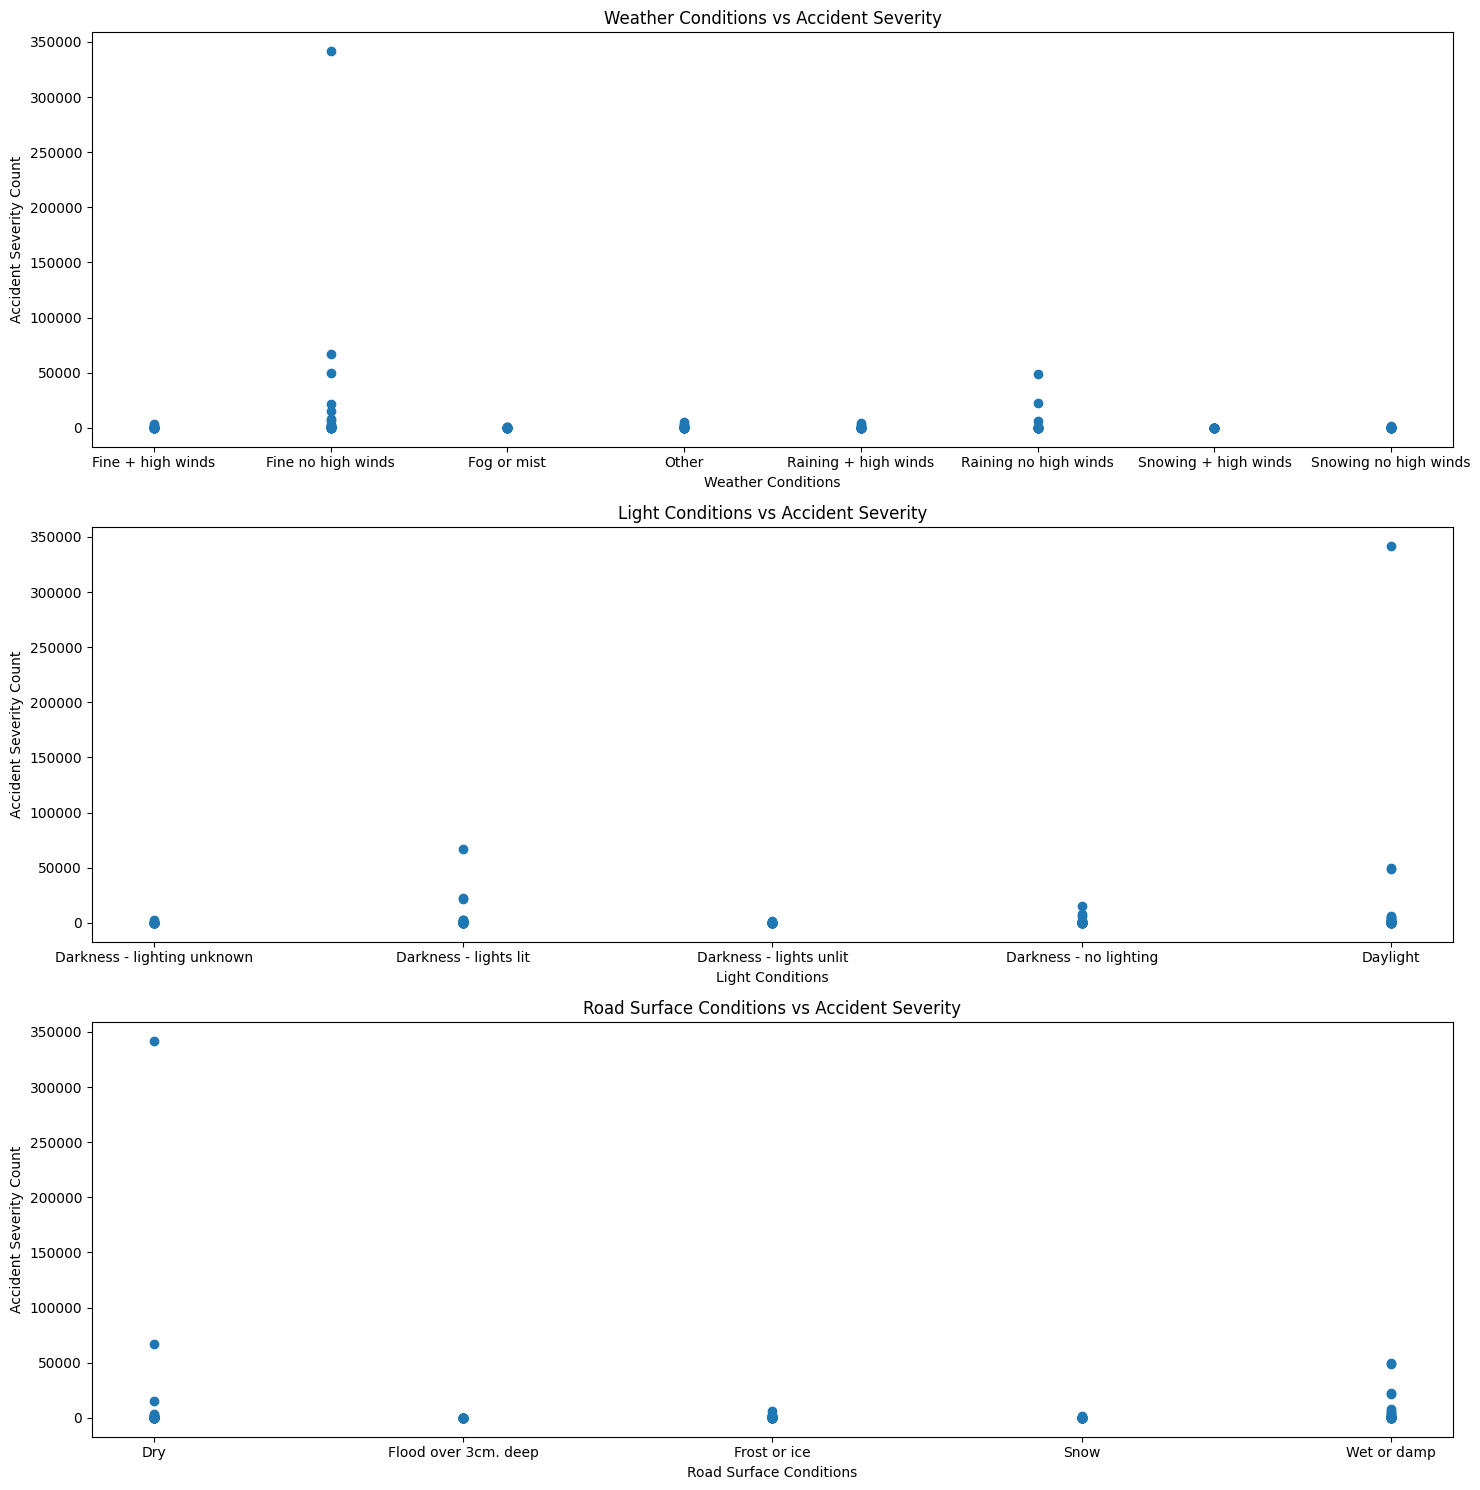

In [35]:
fig, axs = plt.subplots(3, figsize=(15, 15))

# Scatter plot for Weather_Conditions vs Accident_Severity
axs[0].scatter(multivariate_analysis_1.index.get_level_values('Weather_Conditions'), multivariate_analysis_1.sum(axis=1))
axs[0].set_title('Weather Conditions vs Accident Severity')
axs[0].set_xlabel('Weather Conditions')
axs[0].set_ylabel('Accident Severity Count')

# Scatter plot for Light_Conditions vs Accident_Severity
axs[1].scatter(multivariate_analysis_1.index.get_level_values('Light_Conditions'), multivariate_analysis_1.sum(axis=1))
axs[1].set_title('Light Conditions vs Accident Severity')
axs[1].set_xlabel('Light Conditions')
axs[1].set_ylabel('Accident Severity Count')

# Scatter plot for Road_Surface_Conditions vs Accident_Severity
axs[2].scatter(multivariate_analysis_1.index.get_level_values('Road_Surface_Conditions'), multivariate_analysis_1.sum(axis=1))
axs[2].set_title('Road Surface Conditions vs Accident Severity')
axs[2].set_xlabel('Road Surface Conditions')
axs[2].set_ylabel('Accident Severity Count')

plt.tight_layout()
plt.show()

<h3> Darkness + Frost/Ice/Wet/Damp with high winds tends to have more serious and slight accidents. Fatal accidents are less common but present. </h3>

<h3> Daylight + Snow/Frost/Ice in snowing conditions tends to have the highest number of serious and slight accidents, with a significant number of fatal accidents in frosty and snowy conditions. </h3>

<h1> 14. What are the top 5 district areas with the highest number of vehicle accidents? </h1>

In [36]:
accidents['District Area'].value_counts().head(5)

District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Bradford       6212
Sheffield      5710
Name: count, dtype: int64

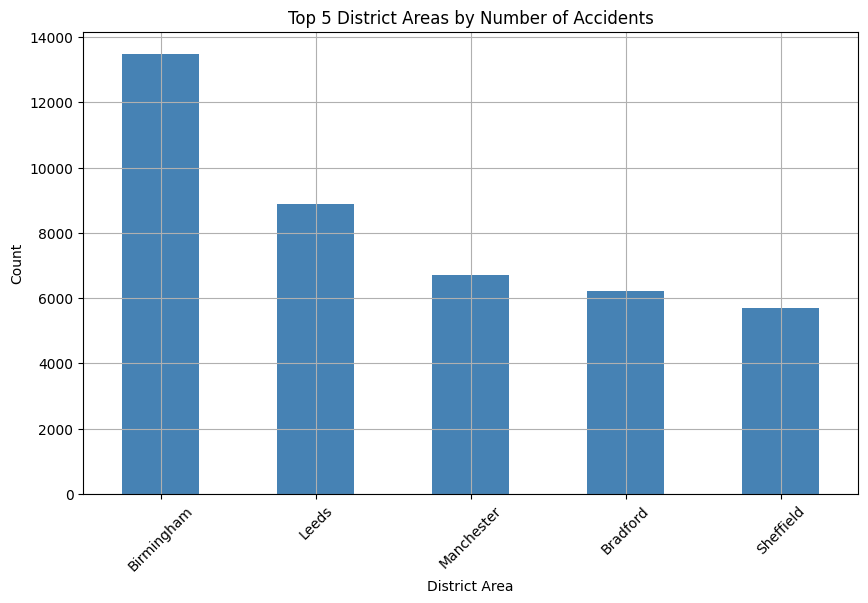

In [37]:
# Assuming top_5_districts is already defined as in your code
top_5_districts = accidents['District Area'].value_counts().head(5)

# Plotting the data
plt.figure(figsize=(10, 6))
top_5_districts.plot(kind='bar', color='steelblue')

# Adding title and labels
plt.title('Top 5 District Areas by Number of Accidents')
plt.xlabel('District Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()

<h3> Birmingham has the highest number of accidents among these district areas, followed by Leeds and Manchester. </h3>

<h1> 15. What percentage of accidents occur in urban areas versus rural areas? </h1>

<h2> What area has the highest rate of accidents? </h2>

In [38]:
accidents['Urban_or_Rural_Area'].value_counts(normalize=True) * 100


Urban_or_Rural_Area
Urban          63.824944
Rural          36.173391
Unallocated     0.001665
Name: proportion, dtype: float64

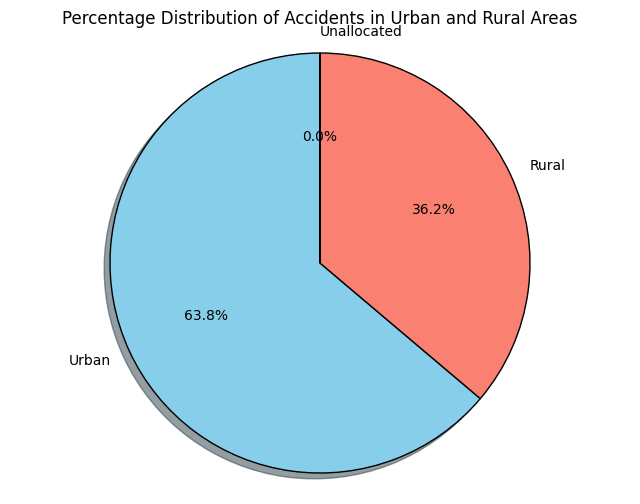

In [39]:
# Calculate the percentage distribution
urban_rural_distribution = accidents['Urban_or_Rural_Area'].value_counts(normalize=True) * 100

# Plotting the data as a pie chart
plt.figure(figsize=(8, 6))
colors = ['skyblue', 'salmon']
explode = (0.1, 0)
urban_rural_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'})

# Adding title and labels
plt.title('Percentage Distribution of Accidents in Urban and Rural Areas')
plt.axis('equal')
plt.ylabel('')

# Display the plot
plt.show()

<h3> Urban has the most percentage of accident with 63.82 </h3>

<h1> 16. What is the relationship between accident date, district area, and accident severity? </h1>

In [40]:
multivariate_analysis_4 = accidents.groupby(['Accident Date', 'District Area'])['Accident_Severity'].value_counts().unstack()
multivariate_analysis_4

Accident_Severity            Fatal  Serious  Slight
Accident Date District Area                        
2019-01-01    Aberdeen City      0        0       1
              Aberdeenshire      0        0       0
              Adur               0        0       0
              Allerdale          0        0       1
              Alnwick            0        0       0
...                            ...      ...     ...
2022-12-12    Wychavon           0        0       1
              Wycombe            0        0       2
              Wyre               0        0       1
              Wyre Forest        0        0       2
              York               0        1       1

[243072 rows x 3 columns]

<h1> 17. How do accident severity, urban/rural areas, and road surface conditions together impact the number of casualties? </h1>

In [41]:
accidents.groupby(['Accident_Severity', 'Urban_or_Rural_Area', 'Road_Surface_Conditions'])['Number_of_Casualties'].mean()


Accident_Severity  Urban_or_Rural_Area  Road_Surface_Conditions
Fatal              Rural                Dry                        2.001375
                                        Flood over 3cm. deep       2.150000
                                        Frost or ice               2.352564
                                        Snow                       2.103448
                                        Wet or damp                2.264355
                   Unallocated          Dry                             NaN
                                        Flood over 3cm. deep            NaN
                                        Frost or ice                    NaN
                                        Snow                            NaN
                                        Wet or damp                     NaN
                   Urban                Dry                        1.529958
                                        Flood over 3cm. deep       3.000000
                        

<h3> Rural Areas generally have higher casualties per accident compared to urban areas across all severity levels and road surface conditions. </h3>

<h3> Fatal Accidents in urban areas during flooding conditions show the highest number of casualties per accident (3.000). </h3>

<h3> Serious and Slight Accidents show a consistent pattern where rural areas have more casualties per accident compared to urban areas, with frost or ice and wet or damp conditions being particularly hazardous. </h3>

<h1> 18. What is the distribution of accidents across different weather conditions? </h1>

<h2> In all weather conditions, which has the least record of accident? </h2>

In [42]:
weather_distribution = accidents['Weather_Conditions'].value_counts()
weather_distribution

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

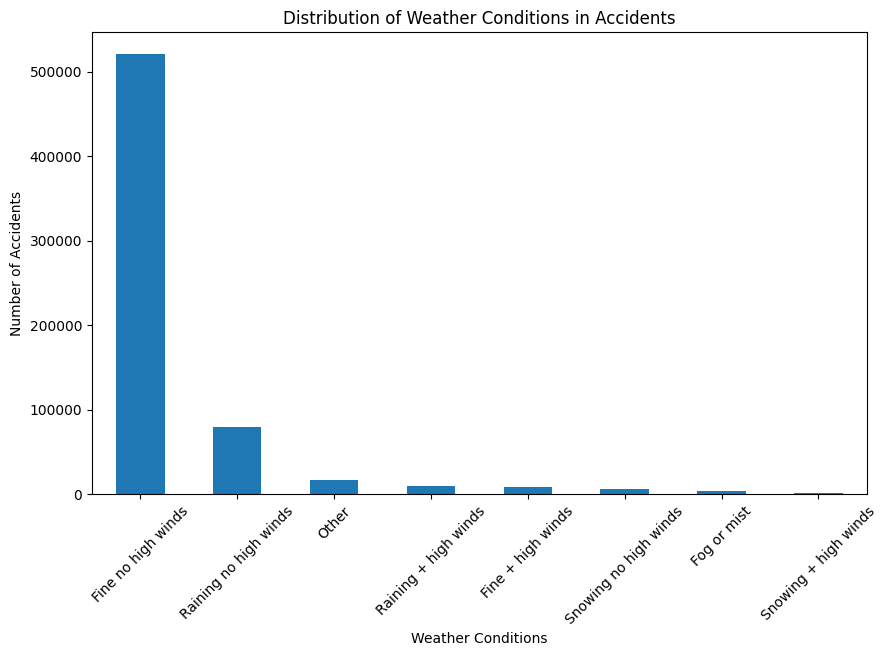

In [43]:
# Assuming `weather_distribution` is your Series
weather_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Weather Conditions in Accidents')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<h3> Snowing and high winds has the least record of accident </h3>

<h1> 19. How does road surface condition affect the number of vehicles involved in accidents? </h1>

In [44]:
road_surface_vehicles = accidents.groupby('Road_Surface_Conditions')['Number_of_Vehicles'].mean()
road_surface_vehicles

Road_Surface_Conditions
Dry                     1.841631
Flood over 3cm. deep    1.610619
Frost or ice            1.640006
Snow                    1.746859
Wet or damp             1.829161
Name: Number_of_Vehicles, dtype: float64

<h3> Weather Conditions:

Fine weather (with or without high winds) generally results in a higher number of accidents across all severities compared to adverse weather conditions such as snow or rain.

For example, "Fine + high winds" and "Daylight" have higher counts across all severities compared to "Snowing no high winds." </h3>

<h3> Road Type:

Dual carriageways tend to have higher accident counts compared to slip roads.

For instance, "Fine + high winds" on a dual carriageway under "Darkness - lights lit" show high accident counts, especially for slight injuries. </h3>

<h3> Light Conditions:

Daylight conditions generally have higher accident counts compared to darkness conditions, whether lighting is available or not.

"Daylight" conditions under various weather and road types have significantly higher accident counts, suggesting better visibility may not always prevent accidents. </h3>

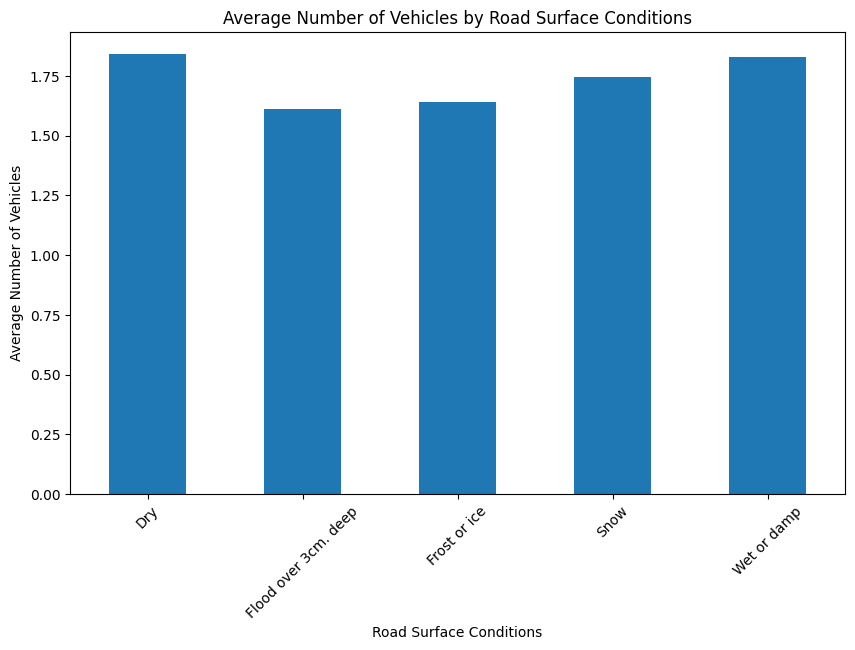

In [45]:
# Assuming `road_surface_vehicles` is your DataFrame
road_surface_vehicles.plot(kind='bar', figsize=(10, 6))
plt.title('Average Number of Vehicles by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Average Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

<h1> 20.What is the impact of weather conditions, road type, and light conditions on accident severity? </h1>

In [46]:
multivariate_analysis_6 = accidents.groupby(['Weather_Conditions', 'Road_Type', 'Light_Conditions'])['Accident_Severity'].value_counts().unstack()
multivariate_analysis_6

Accident_Severity                                                   Fatal  \
Weather_Conditions    Road_Type        Light_Conditions                     
Fine + high winds     Dual carriageway Darkness - lighting unknown      1   
                                       Darkness - lights lit           12   
                                       Darkness - lights unlit          2   
                                       Darkness - no lighting           6   
                                       Daylight                        11   
...                                                                   ...   
Snowing no high winds Slip road        Darkness - lighting unknown      0   
                                       Darkness - lights lit            0   
                                       Darkness - lights unlit          0   
                                       Darkness - no lighting           0   
                                       Daylight                         0   

Accident_Severity                                                   Serious  \
Weather_Conditions    Road_Type        Light_Conditions                       
Fine + high winds     Dual carriageway Darkness - lighting unknown        3   
                                       Darkness - lights lit             50   
                                       Darkness - lights unlit            3   
                                       Darkness - no lighting            17   
                                       Daylight                         107   
...                                                                     ...   
Snowing no high winds Slip road        Darkness - lighting unknown        0   
                                       Darkness - lights lit              1   
                                       Darkness - lights unlit            0   
                                       Darkness - no lighting             4   
                                       Daylight                           2   

Accident_Severity                                                   Slight  
Weather_Conditions    Road_Type        Light_Conditions                     
Fine + high winds     Dual carriageway Darkness - lighting unknown       9  
                                       Darkness - lights lit           281  
                                       Darkness - lights unlit           9  
                                       Darkness - no lighting          135  
                                       Daylight                        873  
...                                                                    ...  
Snowing no high winds Slip road        Darkness - lighting unknown       3  
                                       Darkness - lights lit            24  
                                       Darkness - lights unlit           0  
                                       Darkness - no lighting            5  
                                       Daylight                         30  

[200 rows x 3 columns]

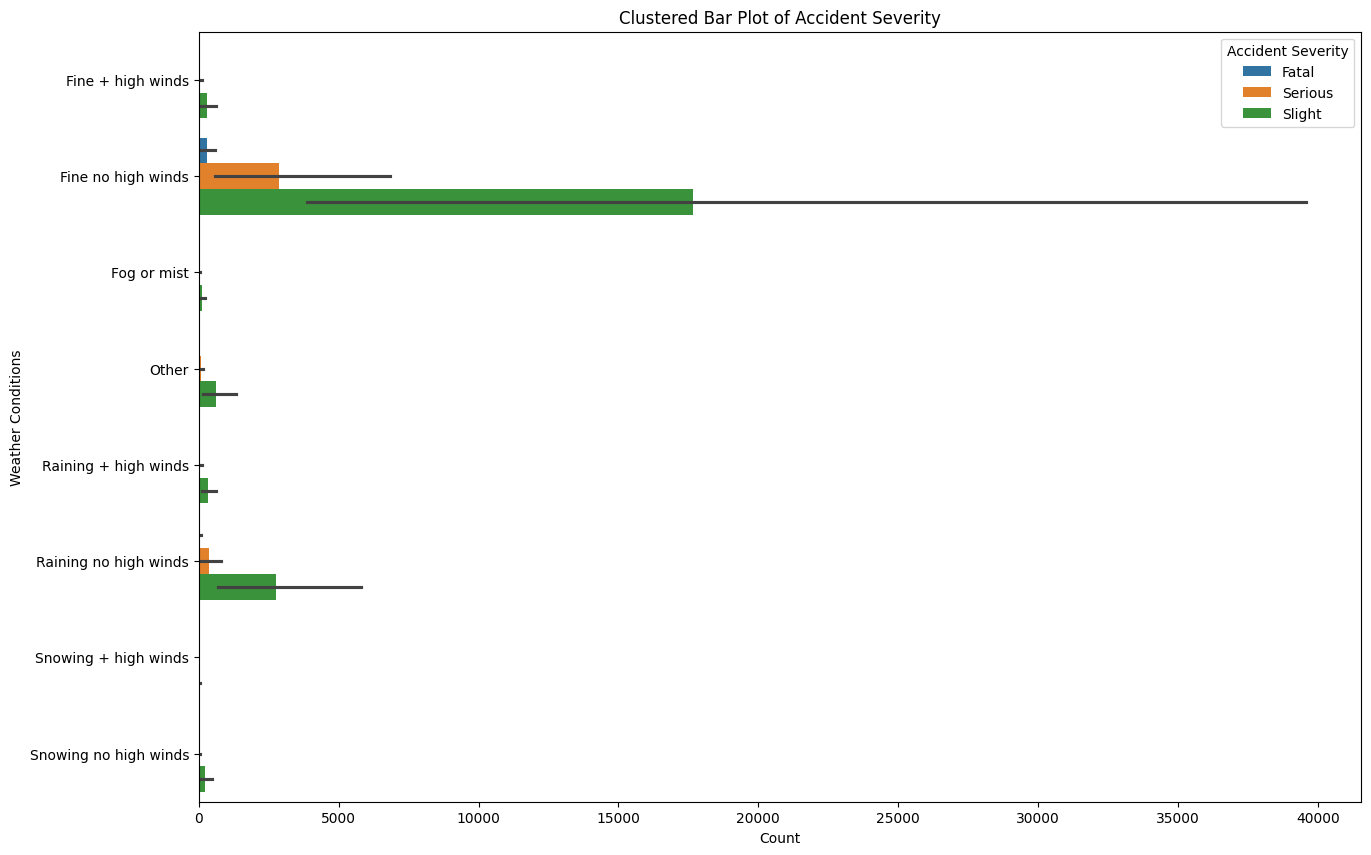

In [47]:

multivariate_analysis_6.reset_index(inplace=True)
multivariate_analysis_6 = multivariate_analysis_6.melt(id_vars=['Weather_Conditions', 'Road_Type', 'Light_Conditions'], var_name='Accident_Severity', value_name='Count')

plt.figure(figsize=(15, 10))
sns.barplot(x='Count', y='Weather_Conditions', hue='Accident_Severity', data=multivariate_analysis_6)
plt.title('Clustered Bar Plot of Accident Severity')
plt.xlabel('Count')
plt.ylabel('Weather Conditions')
plt.legend(title='Accident Severity')
plt.show()